<a href="https://colab.research.google.com/github/garimellahoney2/manvi/blob/master/termpaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Refine_sarcastic.csv to Refine_sarcastic (1).csv


In [0]:
datanonsarcastic = pd.read_csv('Refine_normal.csv')

In [0]:
datasarcastic = pd.read_csv('Refine_sarcastic.csv')

In [0]:
listnon = datanonsarcastic.iloc[:-1].to_numpy()

In [0]:
listyes = datasarcastic.iloc[:-1].to_numpy()

In [0]:
fulltweetsyes = listyes[:,1]

In [0]:
fulltweetsno = listnon[:,1]

In [0]:
fulltweets = []
fulltweets.extend(fulltweetsyes)
fulltweets.extend(fulltweetsno)

In [0]:
labelsyes = listyes[:,0]
labelsnon = listnon[:,0]

In [0]:
lennon = len(labelsnon)
lenyes = len(labelsyes)

In [0]:
print(lennon,lenyes)

6617 5396


In [0]:
labelsnon = [0]*lennon

In [0]:
labelsyes = [1]*lenyes

In [0]:
labels = []
labels.extend(labelsyes)
labels.extend(labelsnon)
print(len(fulltweets),len(labels))


12013 12013


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tf = TfidfVectorizer(min_df = 1,stop_words = 'english')
fulltweets = tf.fit_transform(fulltweets)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(fulltweets,labels,test_size=0.33)

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(x_train,y_train)

predicted = mnb.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted)

In [0]:
from sklearn import svm

In [0]:
clf = svm.SVC(kernel='linear', C=0.01)

In [0]:
clf.fit(x_train,y_train)
predict = clf.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.6070617906683481

In [0]:
#kerenel technique
gamavalues = np.linspace(1,10,5)

In [0]:
accuracy_score_values_kernel = []
from sklearn.metrics import accuracy_score
for i in gamavalues:
    clf2 = svm.SVC(kernel='rbf', gamma=i)
    clf2.fit(x_train,y_train)
    predicted = clf2.predict(x_test)
    accuracy_score_values_kernel.append(accuracy_score(y_test,predicted))
    
    

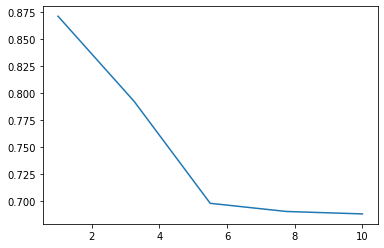

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt 
plt.plot(gamavalues,accuracy_score_values_kernel)